# TASK 2 : Prediction Using Supervised ML
* Task is to predict the percentage of marks that a student is expected to score based on the number of hours he/she studies.
* This is **univariate linear regression** problem ,since we are predicting using just one feature i.e number of hours.


## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

## 2. Analysing data

In [4]:
# loading dataset
data = pd.read_csv('student_scores .csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# descriptive statistics of dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# shape of dataset(rows and columns)
data.shape

(25, 2)

In [8]:
# more info on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
# knowing the datatypes of attributes/features
data.dtypes

Hours     float64
Scores      int64
dtype: object

## 3. Plotting the data

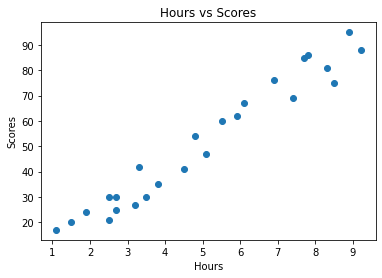

In [11]:
pyplot.scatter(data['Hours'],data['Scores'])
pyplot.xlabel('Hours')
pyplot.ylabel('Scores')
pyplot.title('Hours vs Scores')
pyplot.show()

### Observation
* Number of Hours studied is linearly related to the scores of the student.
* That is more the number of hours studied ,higher the score attained.

## 4. Train-Test-Split

In [21]:
# sklearn
from sklearn.model_selection import train_test_split
seed = 7
x_train,x_test,y_train,y_test = train_test_split(data['Hours'].values.reshape(-1,1),data['Scores'],test_size=0.2,random_state=seed)
print("x_train :",x_train)
print("x_train shape : ",x_train.shape)
print("x_test :",x_test)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)



x_train : [[4.8]
 [2.7]
 [2.5]
 [4.5]
 [2.5]
 [6.9]
 [9.2]
 [2.7]
 [1.9]
 [7.8]
 [7.7]
 [6.1]
 [8.3]
 [1.1]
 [5.5]
 [7.4]
 [8.5]
 [3.8]
 [3.5]
 [8.9]]
x_train shape :  (20, 1)
x_test : [[5.1]
 [1.5]
 [5.9]
 [3.3]
 [3.2]]
x_test shape :  (5, 1)
y_train shape :  (20,)
y_test shape :  (5,)


## 5. Training the Model

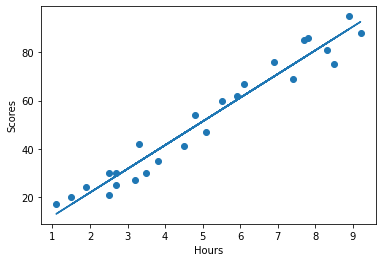

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# fitting the model
model.fit(x_train,y_train)

coefficient = model.coef_
intercept = model.intercept_

# y = m*x + c
line = (data['Hours'].values * coefficient) + intercept

pyplot.scatter(data.Hours,data.Scores)
pyplot.plot(data.Hours,line)
pyplot.xlabel('Hours')
pyplot.ylabel('Scores')
pyplot.show()

## 6. Predicting and crosschecking

In [25]:
pred = model.predict(x_test)
print(pred)

[52.33357604 16.89577953 60.20864193 34.61467779 33.63029455]


In [27]:
# comparing actual and predicted values
prediction_compare = pd.DataFrame({'Actual values': y_test,'Predicted Values': pred})
print(prediction_compare)

    Actual values  Predicted Values
1              47         52.333576
5              20         16.895780
11             62         60.208642
13             42         34.614678
2              27         33.630295


# 7. Evaluating the Model

In [28]:
from sklearn import metrics

print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,pred))
print('Mean Absolute Error: ',metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',metrics.mean_squared_error(y_test,pred)**0.5)
print('R2 Score: ',metrics.r2_score(y_test,pred))

Mean Absolute Error:  4.848954268442984
Mean Absolute Error:  27.959194372411737
Root Mean Squared Error:  5.287645446927369
R2 Score:  0.8735107022601714


**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [29]:
hours = np.asarray(9.25).reshape(-1,1)
print(f'{model.predict(hours)[0]} will be predicted score if a student study for 9.25 hours per day.')

93.18548035389907 will be predicted score if a student study for 9.25 hours per day.
